# Vector Embedding

## Vectors

A vector is a mathematical object that has both magnitude and direction. It is often represented as an arrow in a coordinate system, where the length of the arrow represents the magnitude and the direction of the arrow represents the direction.

$$
\vec{v} = \begin{pmatrix} 3 \\ 4 \end{pmatrix}
$$

We will use [Numpy](https://numpy.org/) for fast vector operations.

<img src="img/numpy.png" alt="Numpy" width="400">

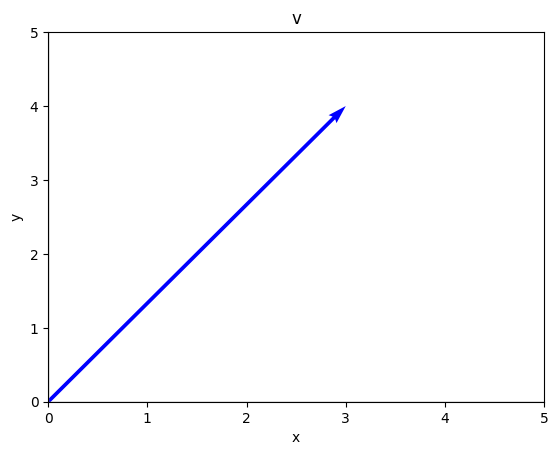

In [1]:
from my_functions import draw_vectors
import numpy as np

v = np.array([3, 4])

draw_vectors([[3, 4, "b"]], [0, 5], [0, 5], "v")

### Vector Norm (Magnitude|Length)

The norm of a vector is a measure of the length of the vector. It is calculated as the square root of the sum of the squares of the vector elements.

$$
\| \vec{v} \| = \sqrt{3^2 + 4^2}=5

In [2]:
np.linalg.norm(v)

np.float64(5.0)

### Vector Normalization

Normalization is the process of scaling individual samples to have unit norm. In case of vectors, it is the process of scaling a vector to have a length of 1. It is done by dividing the vector by its norm. The normalized vector is also called a unit vector written as $\vec{v_0}$.

$$
\vec{v_0} = \frac{\vec{v}}{\| \vec{v} \|} = \frac{\begin{pmatrix} 3 \\ 4 \end{pmatrix}}{5} = \begin{pmatrix} 0.6 \\ 0.8 \end{pmatrix}
$$

$$
\| \vec{v_0} \| = \sqrt{0.6^2 + 0.8^2} = 1
$$

The direction of the vector keeps the same after normalization.

In [3]:
v0 = v / np.linalg.norm(v)
v0

array([0.6, 0.8])

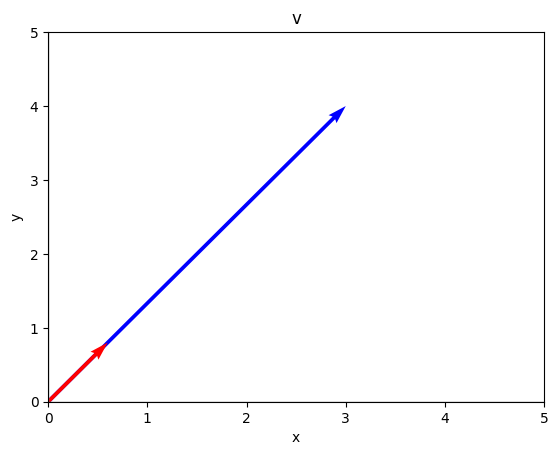

In [4]:
draw_vectors([[3, 4, "b"], [0.6, 0.8, "r"]], [0, 5], [0, 5], "v")

### Vector Multiplication (Dot Product)

The dot product of two vectors is a scalar quantity that is calculated as the sum of the products of the corresponding elements of the two vectors. It is also called the inner product. The dot product has a result of zero if the two vectors are orthogonal (perpendicular) to each other.

$$
\vec{v} \cdot \vec{w} = \begin{pmatrix} 3 \\ 4 \end{pmatrix} \cdot \begin{pmatrix} -4 \\ 3 \end{pmatrix} = 3 \cdot (-4) + 4 \cdot 3 = 0
$$

In [5]:
w = np.array([-4, 3])
a = np.array([2, 1])
print(np.dot(v, a))  # static method
print(v.dot(a))  # instance method

10
10


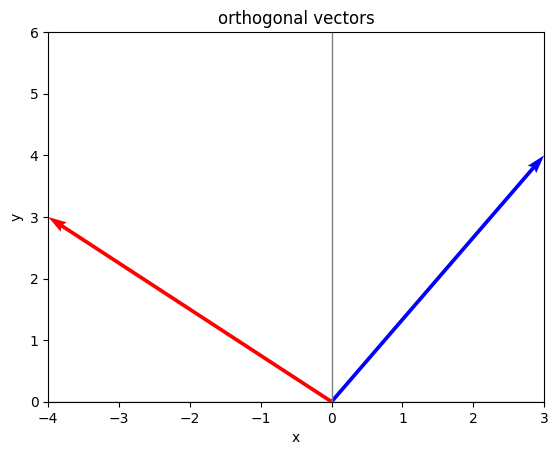

In [6]:
draw_vectors([[3, 4, "b"], [-4, 3, "r"]], [-4, 3], [0, 6], "orthogonal vectors")

### Angle Between Vectors

The angle is independent of the magnitude of the vectors and is calculated as the inverse cosine of the dot product of the vectors divided by the product of the magnitudes of the vectors.

![Angle Between Vectors](img/angle.png)

$$
\cos(\phi) = \frac{\vec{v} \cdot \vec{w}}{\| \vec{v} \| \cdot \| \vec{w} \|} = \text{cosine similarity}
$$

So if the magnitudes of the vectors are 1, the cosine similarity is the same as the dot product because the division by 1 does not change the value!

$$
\cos(\phi) = \vec{v_0} \cdot \vec{w_0} = \text{cosine similarity}
$$

#### Cosine Similarity

The cosine similarity has a range of [-1,1].

| Cosine Similarity | Angle |
| --- | --- |
| 1 | 0° |
| 0 | 90° |
| -1 | 180° |



### More Dimensions

*Above you have seen nicely drawn 2D vectors. It is possible to draw 3D vectors as well, but it is not possible to draw 4D vectors and higher. But the math works the same way. The dot product and the angle between vectors are calculated the same way.*

## Embeddings

An embedding model takes data like texts, images, or audio and converts it into a vector space. The vector space is a multi-dimensional space where each dimension represents a feature of the data. The embedding model learns to map the data into the vector space in such a way that similar data points are close to each other in the vector space.

![Embedding](img/embedding.png)

Source: https://jkfran.com/introduction-vector-embedding-databases.md

Embeddings are used in many machine learning tasks, such as natural language processing, computer vision, and recommendation systems. Now it's easier to find similar items, compare items, and make predictions based on the data.

### Text Embeddings using local open source models

- [sentence-transformers](https://www.sbert.net)
- [transformers](https://huggingface.co/transformers/)

It is possible to use the sentence-transformers library to create embeddings for text data and images. The library provides pre-trained models that can be used to create embeddings for text data and images and is based on PyTorch. The library also provides a simple API for creating embeddings and performing similarity searches. The models give you the vector as a numpy array so the cosine similarity can be calculated easily.

Just install the python library with pip:

In [7]:
%pip install sentence-transformers

   ---------------------------------------- 0.0/111.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/111.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/111.0 MB 1.3 MB/s eta 0:01:26
   ---------------------------------------- 0.8/111.0 MB 1.4 MB/s eta 0:01:19
   ---------------------------------------- 1.0/111.0 MB 1.5 MB/s eta 0:01:15
    --------------------------------------- 1.6/111.0 MB 1.6 MB/s eta 0:01:10
    --------------------------------------- 1.8/111.0 MB 1.6 MB/s eta 0:01:10
    --------------------------------------- 2.1/111.0 MB 1.5 MB/s eta 0:01:12
    --------------------------------------- 2.4/111.0 MB 1.5 MB/s eta 0:01:15
    --------------------------------------- 2.6/111.0 MB 1.5 MB/s eta 0:01:15
    --------------------------------------- 2.6/111.0 MB 1.5 MB/s eta 0:01:15
   - -------------------------------------- 2.9/111.0 MB 1.4 MB/s eta 0:01:20
   - -------------------------------------- 3.1/111.0 MB 1.3 MB/s eta 0:01:21



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#Please install the backwards-compatible tf-keras package if errors occure for the next code block with
%pip install tf-keras


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 2.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 2.6 MB/s eta 0:00:01
   ------------------------------------- -- 1.6/1.7 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.7 MB 2.4 MB/s eta 0:02:18
   ---------------------------------------- 1.0/331.7 MB 2.5 MB/s eta 0:02:12
   ---------------------------------------- 1.6/331.7 MB 2.5 MB/s eta 0:02:10
   ---------------------------------------- 2.1/331.7 MB 2.6 MB/s eta 0:02:10
   ---------------------------------------- 2.6/331.7 MB 2.6 MB/s eta 0:02:09
   ---------------------------------------- 3.1/331.7 MB 2.5 MB/s eta 0:02:10
   ---------------------

In [9]:
#if you get 'pyarrow' has no attribute '__version__' fix it with:
%pip install pyarrow --upgrade

   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
    --------------------------------------- 0.5/28.1 MB 2.4 MB/s eta 0:00:12
   - -------------------------------------- 1.0/28.1 MB 2.5 MB/s eta 0:00:11
   -- ------------------------------------- 1.6/28.1 MB 2.5 MB/s eta 0:00:11
   -- ------------------------------------- 2.1/28.1 MB 2.5 MB/s eta 0:00:11
   --- ------------------------------------ 2.6/28.1 MB 2.5 MB/s eta 0:00:11
   ---- ----------------------------------- 3.1/28.1 MB 2.5 MB/s eta 0:00:11
   ----- ---------------------------------- 3.7/28.1 MB 2.5 MB/s eta 0:00:10
   ----- ---------------------------------- 4.2/28.1 MB 2.5 MB/s eta 0:00:10
   ------ --------------------------------- 4.7/28.1 MB 2.5 MB/s eta 0:00:10
   ------- -------------------------------- 5.2/28.1 MB 2.5 MB/s eta 0:00:10
   -------- ------------------------------- 5.8/28.1 MB 2.5 MB/s eta 0:00:09
   -------- ------------------------------- 6.3/28.1 MB 2.5 MB/s eta 0:00:09
   ---


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

model = SentenceTransformer("all-mpnet-base-v2")  # download the model

c:\Users\fabia\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


OSError: [WinError 1114] Eine DLL-Initialisierungsroutine ist fehlgeschlagen. Error loading "c:\Users\fabia\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\lib\c10.dll" or one of its dependencies.

What is important for a model? Parameters?
[Check out the used model and its description](https://www.sbert.net/docs/sentence_transformer/pretrained_models.html#original-models)

### Basic example

In [5]:
words = ["dog", "cat", "animal", "house", "castle", "ship", "boat"]
embeddings = [model.encode(word) for word in words]

Let's take a look at this [site](https://projector.tensorflow.org/)

In [6]:
with open ("words.tsv", "w") as f:
    for word in words:
        f.write(word + "\n")

with open("embeddings.tsv", "w") as f:
    for embedding in embeddings:
        f.write("\t".join([str(x) for x in embedding]) + "\n")


**Information about an embedding**

In [7]:
# Embedding of word "dog"

print("Type:", type(embeddings[0]))
print("Embedding:", embeddings[0])
print("Dimensions:", len(embeddings[0]))
print("Norm:", np.linalg.norm(embeddings[0]))

Type: <class 'numpy.ndarray'>
Embedding: [ 2.15680525e-02  4.31967862e-02 -2.19510421e-02 -1.18855108e-02
  1.25830220e-02  9.54331737e-03 -3.93586932e-03  3.03479154e-02
 -3.11429892e-02 -2.28111092e-02  2.09214073e-02  1.01412721e-01
 -7.58953914e-02 -1.96846500e-02  4.39451225e-02 -2.80988757e-02
  7.84055330e-03  5.95424026e-02  2.86845006e-02 -3.85588296e-02
  9.72397253e-03  3.11239269e-02 -3.87739041e-03  2.06515025e-02
 -4.12504636e-02  1.47270188e-02 -3.54370698e-02 -2.30540056e-02
 -1.11108860e-02 -7.22474307e-02  1.01863872e-03 -2.88138576e-02
  7.03546626e-04  2.91240271e-02  2.04954108e-06 -2.59623230e-02
  1.96903683e-02 -9.40593146e-03  5.52033484e-02 -8.49733576e-02
 -2.35349238e-02 -2.72107404e-02 -2.97610257e-02 -1.23223546e-03
 -2.13241726e-02  2.71349214e-02  7.55752996e-02  1.03271969e-01
 -4.41861525e-02  4.65639606e-02 -1.53999906e-02 -6.31060824e-02
 -2.01705545e-02 -3.91009357e-03  1.66066345e-02 -4.46253680e-02
  1.88666750e-02  3.90081964e-02 -4.75607999e-02 

As you can see in the example below, the embedding is a list of 768 float numbers. The model gives us vectors with a norm of 1. The vectors are already normalized and the dot product can be used to calculate the cosine similarity.

Now lets compare "dog" and "boat" with the other words.

In [8]:
comparisons = {"word": [], "Cosine similarity": []}

for i in range(0, len(words)):
    word = words[i]
    embedding = embeddings[i]
    similarity = np.dot(embeddings[0], embedding)  # Cosine similarity
    comparisons["word"].append(word)
    comparisons["Cosine similarity"].append(similarity)

print("Dog")
pd.DataFrame(comparisons).sort_values("Cosine similarity", ascending=False)

Dog


,word,Cosine similarity
0,dog,1.000000
2,animal,0.786468
1,cat,0.608123
6,boat,0.347418
4,castle,0.308491
3,house,0.293382
5,ship,0.269978


In [9]:
comparisons = {"word": [], "Cosine similarity": []}

for i in range(0, len(words)):
    word = words[i]
    embedding = embeddings[i]
    similarity = np.dot(embeddings[len(words) - 1], embedding)  # Cosine similarity
    comparisons["word"].append(word)
    comparisons["Cosine similarity"].append(similarity)

print("Boat")
pd.DataFrame(comparisons).sort_values("Cosine similarity", ascending=False)

Boat


,word,Cosine similarity
6,boat,1.000000
5,ship,0.663963
4,castle,0.396710
1,cat,0.380228
2,animal,0.370248
3,house,0.358459
0,dog,0.347418


you can use the `util` module to calculate the cosine similarity between the vectors or a vector with a list of vectors.

In [10]:
dog = model.encode("dog")
cat = model.encode("cat")

others = [model.encode(word) for word in words]

print("Dog vs Cat:", util.dot_score(dog, cat))
print("Dog vs all others:", util.cos_sim(dog, others))

Dog vs Cat: tensor([[0.6081]])
Dog vs all others: tensor([[1.0000, 0.6081, 0.7865, 0.2934, 0.3085, 0.2700, 0.3474]])


d:\anaconda3\Lib\site-packages\sentence_transformers\util.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  a = torch.tensor(a)


### More Examples

Here the strength of the embedding model becomes clear.

In [11]:
def compare(s):
    sim1 = np.dot(model.encode(s[0]), model.encode(s[1]))
    sim2 = np.dot(model.encode(s[0]), model.encode(s[2]))
    return (sim1, sim2)


sentences = [
    # Although sentences 1 and 2 use different words (soccer, football),
    # the cosine similarity of 1 and 2 is higher compared to 1 and 3 because
    # the meaning of 1 and 2 is more similar.
    [
        "I enjoy playing soccer on weekends.",
        "Football is my favorite sport. Playing it on weekends with friends helps me to relax.",
        "In Austria, people often watch soccer on TV on weekends.",
    ],
    # Here we test whether the OpenAI embedding model "understands", that the
    # contextual meaning of "Java" is different in sentences 1 and 2. Therefore,
    # the cosine similarity of 1 and 3 is higher as both are programming-related.
    [
        "He is interested in Java programming.",
        "He visited Java last summer.",
        "He recently started learning Python programming.",
    ],
    # The next example deals with negation handling. All three sentences are
    # about whether someone likes going to the gym. Sentences 1 and 3 are positive
    # (i.e. like training in the gym), while 2 is not. Therefore, 1 and 3 have
    # a higher cosine similarity.
    [
        "I like going to the gym.",
        "I don't like going to the gym.",
        "I don't dislike going to the gym.",
    ],
    # Let's take a look at ideomatic expressions. Sentences 1 and 2 have very
    # similar meaning. 3 also contains "cats and dogs", but the meaning is different.
    # As a result, cosine similarity between 1 and 2 is higher.
    [
        "It's raining cats and dogs.",
        "The weather is very bad, it's pouring outside.",
        "Cats and dogs don't go outside when it rains.",
    ],
    # The last example demonstrates knowledge of the pre-trained models. Berry Harris is
    # a well-known teacher in Jazz. Using "the 6th on the 5th" is typical for him.
    # One must know Berry Harris and the musical theory that he has tought to
    # understand the similarity of the sentences 1 and 2. OpenAI embeddings
    # do not understand that.
    [
        "I like how Barry Harris described Jazz theory.",
        "Playing the 6th on the 5th is an important concept that you must understand.",
        "My friends Barry and Harris often visit me to play computer games.",
    ],
]
print(f"Semantic similarity: {compare(sentences[0])}")
print(f"Contextual meaning: {compare(sentences[1])}")
print(f"Negation handling: {compare(sentences[2])}")
print(f"Idiomatic expressions: {compare(sentences[3])}")
print(f"Knowledge: {compare(sentences[4])}")

Semantic similarity: (0.74855006, 0.5908042)
Contextual meaning: (0.533533, 0.5705779)
Negation handling: (0.604437, 0.8280498)
Idiomatic expressions: (0.59035563, 0.5685181)
Knowledge: (0.17464042, 0.16009748)


### My trip advisor

I will use the text-embedding-3-large model to create a trip advisor. The user can input a text and the model will find the most similar destinations in the database. The database contains 9 different locations with a description. The model will return the most similar locations to the user input.

In [12]:
descriptions = [
    "Maldives, Maldives: A tropical paradise with pristine beaches. Activities: Snorkeling, Scuba diving, Relaxing on the beach.",
    "Paris, France: The City of Love, famous for its iconic landmarks and art. Activities: Eiffel Tower visit, Louvre Museum, Seine River cruise.",
    "Maui, Hawaii: A beautiful island with stunning beaches and lush landscapes. Activities: Surfing, Hiking, Whale watching.",
    "Cancun, Mexico: A popular beach destination with crystal-clear waters. Activities: Swimming, Snorkeling, Exploring Mayan ruins.",
    "Tokyo, Japan: A vibrant metropolis with a mix of modern and traditional attractions. Activities: Shibuya crossing, Tokyo Disneyland, Tsukiji Fish Market.",
    "Banff National Park, Canada: A breathtaking national park with stunning mountain scenery. Activities: Hiking, Wildlife spotting, Canoeing.",
    "Norwegian Fjords, Norway: A picturesque region with majestic fjords and waterfalls. Activities: Fjord cruises, Hiking, Kayaking.",
    "New York City, USA: The Big Apple, known for its skyscrapers, museums, and diverse culture. Activities: Times Square, Central Park, Statue of Liberty visit.",
    "Plitvice Lakes National Park, Croatia: A natural wonderland with cascading lakes and waterfalls. Activities: Walking trails, Boat rides, Wildlife watching.",
]

destinations = []

for description in descriptions:
    parts = description.split(": ")
    destinations.append(
        {
            "Name": parts[0],
            "Description": parts[1],
            "Embedding": model.encode(parts[1]),
        }
    )

In [13]:
search_values = [
    "My next holidays should be in a sunny place with a nice beach",
    "I want to see beautiful nature",
    "In the next summer I would like to visit a famous city with a lot of culture",
    "What is the name of Bart Simpsons sister?"
]

number = 3  # 0, 1, 2

search_embedding = model.encode(search_values[number])

data = {"Name": [], "Similarity": []}
for destination in destinations:
    similarity = np.dot(search_embedding, destination["Embedding"])
    data["Name"].append(destination["Name"])
    data["Similarity"].append(similarity)
print(f"Search: {search_values[number]}")
pd.DataFrame(data).sort_values("Similarity", ascending=False)

Search: What is the name of Bart Simpsons sister?


,Name,Similarity
3,"Cancun, Mexico",0.152799
2,"Maui, Hawaii",0.134152
0,"Maldives, Maldives",0.110264
1,"Paris, France",0.101331
6,"Norwegian Fjords, Norway",0.093906
8,"Plitvice Lakes National Park, Croatia",0.083514
5,"Banff National Park, Canada",0.049826
4,"Tokyo, Japan",0.020820
7,"New York City, USA",0.016422


## Vector Search and the RAG Pattern

Embeddings play a crucial role in _Retrieval-Augmented Generation_ (_RAG_) solutions, an approach in artificial intelligence that combines the capabilities of information retrieval and text generation. In RAG systems, embeddings are used to retrieve relevant information from large datasets or knowledge bases. It is not necessary for these databases to have been included in the original training of the embeddings models. They can be internal data sets that are not publicly accessible on the internet.

In RAG solutions, queries or input texts are transformed into embeddings. Then, the cosine similarity to the document embeddings existing in the database is calculated to identify the most relevant text sections from the database. These retrieved pieces of information are then used by a text generation model like _ChatGPT_ to generate contextually relevant answers or content.

_Vector databases_ play a central role in the functioning of RAG systems. They are designed to efficiently store, index, and query high-dimensional vectors. In the context of RAG solutions and similar systems, vector databases serve as a storage for the embeddings of documents or data pieces that come from a large pool of information. When a user makes a query, this query is first transformed into an embedding vector. The vector database is then used to quickly find the vectors that correspond most closely to this query vector - that is, those documents or pieces of information that show the highest similarity. This process of quickly finding similar vectors in large datasets is known as _Nearest Neighbor Search_.

In [19]:
#if necessary install openai
%pip install openai

   ---------------------------------------- 0.0/373.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/373.5 kB ? eta -:--:--
   ----------------- ---------------------- 163.8/373.5 kB 5.0 MB/s eta 0:00:01
   -------------------------------------- - 358.4/373.5 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 373.5/373.5 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   -------------------------------------- - 184.3/191.0 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from openai import OpenAI  # OpenAI's Python client

#my personal key so you can use openai without a credit card for our course but not excessively please ;) - do not give it to others please
client = OpenAI(api_key="")

In [15]:
#built the options for the travel agent from our initial destination set 
search_values = [
    "My next holidays should be in a sunny place with a nice beach",
    "I want to see beautiful nature",
    "In the next summer I would like to visit a famous city with a lot of culture",
    "What is the name of Bart Simpsons sister?",
]

number = 3  # 0, 1, 2
search_embedding = model.encode(search_values[number])

data = {"Destination": [], "Similarity": []}
for destination in destinations:
    similarity = np.dot(search_embedding, destination["Embedding"])
    data["Destination"].append(destination["Name"] + ": " + destination["Description"])
    data["Similarity"].append(similarity)
print(f"Search: {search_values[number]}")
sorted_result = list(
    pd.DataFrame(data).sort_values("Similarity", ascending=False).head(3)["Destination"]
)
sorted_result

Search: What is the name of Bart Simpsons sister?


['Cancun, Mexico: A popular beach destination with crystal-clear waters. Activities',
 'Maui, Hawaii: A beautiful island with stunning beaches and lush landscapes. Activities',
 'Maldives, Maldives: A tropical paradise with pristine beaches. Activities']

In [16]:
from string import Template

t = Template(
    """
You are a helpful assistant in a travel agency. Customers are describing
what they want to do in their vacation. Make suggestions based on the
city descriptions provided below. ONLY use the provided city descriptions.
Do NOT use other information sources.

If you cannot generate a meaningful answer based on the given city description,
say "Sorry, I cannot help". If the user's input is not related to finding
a travel location, say "Sorry, I can only help with vacation locations".

===========
$options
===========
"""
)

system_prompt = t.substitute(options="\n\n".join([item for item in sorted_result[:3]]))
print(system_prompt)


You are a helpful assistant in a travel agency. Customers are describing
what they want to do in their vacation. Make suggestions based on the
city descriptions provided below. ONLY use the provided city descriptions.
Do NOT use other information sources.

If you cannot generate a meaningful answer based on the given city description,
say "Sorry, I cannot help". If the user's input is not related to finding
a travel location, say "Sorry, I can only help with vacation locations".

Cancun, Mexico: A popular beach destination with crystal-clear waters. Activities

Maui, Hawaii: A beautiful island with stunning beaches and lush landscapes. Activities

Maldives, Maldives: A tropical paradise with pristine beaches. Activities



In [17]:
print("ChatGPT-3.5 Answer:")
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": system_prompt,
        },
        {
            "role": "user",
            "content": search_values[number],
        },
    ],
    model="gpt-3.5-turbo",
)
print(chat_completion.choices[0].message.content)

ChatGPT-3.5 Answer:
Sorry, I can only help with vacation locations.


## Vector Databases

![Vector Database](img/qdrant.png)

Vector databases are databases that store vectors and allow you to perform similarity searches on the vectors. They are used to store and search for embeddings. The Qdrant vector database is an open-source vector database written in Rust.

Vector database improve the performance of similarity searches by using algorithms that are optimized for searching in high-dimensional vector spaces.

Here you can see how to use the Qdrant vector database to store and search for embeddings.

**Start docker container in background:**

```bash
docker container run -d --name qdrant -p 6333:6333 qdrant/qdrant
```

### Connect to the database and create collection

In [24]:
#install qdrant client if necessary
%pip install qdrant_client

   ---------------------------------------- 0.0/259.4 kB ? eta -:--:--
   ---------------------------------------  256.0/259.4 kB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 259.4/259.4 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------  1.1/1.1 MB 67.2 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 67.2 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 9.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
   ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/431.5 kB ? eta -:--:--
   ---------------------------------------  430.1/431.5 kB ? eta -:--:--
   ---------------------------------------  430.1/431.5 kB ? eta -:--:--
   ---------------------------------------- 431.5/431.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: p

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires protobuf<5,>=3.20, but you have protobuf 5.28.0 which is incompatible.
tensorflow-intel 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.28.0 which is incompatible.


In [27]:
#this might mess up tensorflow 2.17 needed later on, can be fixed with checking your environment and downgrading protobuf via
%pip install protobuf==4.25.3

   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
    --------------------------------------- 10.2/413.4 kB ? eta -:--:--
    --------------------------------------- 10.2/413.4 kB ? eta -:--:--
   --- ----------------------------------- 41.0/413.4 kB 326.8 kB/s eta 0:00:02
   ---------------------------------------  409.6/413.4 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 413.4/413.4 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.0
    Uninstalling protobuf-5.28.0:
      Successfully uninstalled protobuf-5.28.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.66.1 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.3 which is incompatible.


In [18]:
#run just once!
from qdrant_client import QdrantClient  # Qdrant's Python client

qdrant = QdrantClient("localhost", port=6333)  # Connect to Qdrant

from qdrant_client.http.models import Distance, VectorParams

qdrant.create_collection(
    collection_name="destinations",
    vectors_config=VectorParams(
        size=768, distance=Distance.DOT
    ),  # Could be Distance.COSINE
)

UnexpectedResponse: Unexpected Response: 409 (Conflict)
Raw response content:
b'{"status":{"error":"Wrong input: Collection `destinations` already exists!"},"time":0.000077609}'

In [19]:
from qdrant_client.http.models import PointStruct

points = []

# add points to my array

for i, destination in enumerate(destinations):
    points.append(
        PointStruct(
            id=i,
            #vector=destination["Embedding"],
            vector=destination["Embedding"].tolist(),
            payload={"destination": destination["Name"]},
        )
    )

# add points to the collection

operation_info = qdrant.upsert(
    collection_name="destinations",
    wait=True,
    points=points,
)

print(operation_info)

operation_id=1 status=<UpdateStatus.COMPLETED: 'completed'>


In [20]:
search_result = qdrant.search(
    collection_name="destinations",
    query_vector=model.encode("I want to see beautiful nature"),
    limit=3,
)

search_result

[ScoredPoint(id=5, version=1, score=0.54903406, payload={'destination': 'Banff National Park, Canada'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=2, version=1, score=0.43559375, payload={'destination': 'Maui, Hawaii'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=6, version=1, score=0.43246657, payload={'destination': 'Norwegian Fjords, Norway'}, vector=None, shard_key=None, order_value=None)]

## Text and Image Models

The sentence-transformers library provides pre-trained models that can be used to create embeddings for text data and images. It will embed texts and images into a vector space where similar items are close to each other.

The "clip-ViT-B-32" model is used in this notebook. This model is based on the CLIP (Contrastive Language-Image Pretraining) model, which was developed by OpenAI. The CLIP model is a multimodal model that can process both text and images, and is trained to generate embeddings that are similar for semantically similar text and images.

There is a model called "clip-ViT-B-32-multilingual-v1" which is trained on multiple languages. With this model you can get embeddings for text in multiple languages to compare them with images.

In [22]:
#install datasets if necessary
%pip install datasets

  Using cached datasets-2.21.0-py3-none-any.whl.metadata (21 kB)
  Using cached multiprocess-0.70.16-py311-none-any.whl.metadata (7.2 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
Using cached datasets-2.21.0-py3-none-any.whl (527 kB)
Using cached multiprocess-0.70.16-py311-none-any.whl (143 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
  Attempting uninstall: dill
    Found existing installation: dill 0.3.7
    Uninstalling dill-0.3.7:
      Successfully uninstalled dill-0.3.7
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [23]:
from datasets import load_dataset

dataset = load_dataset("schrilax/favorite-actors")


Generating train split:   0%|          | 0/121 [00:00<?, ? examples/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7C71BC368610>


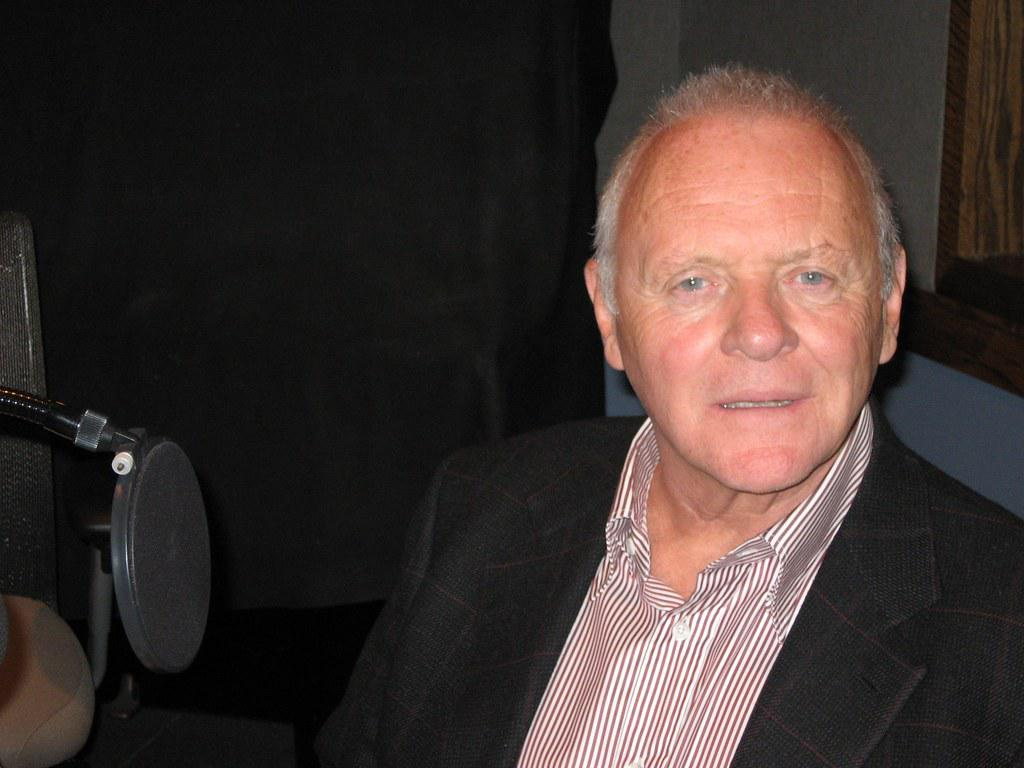

In [ ]:
#get all images of actors in an array
#import PIL
#from PIL import Image
images = dataset["train"]["image"]
dataset["train"]
print(images[1])
images[1]

In [4]:
# model for images and text
model = SentenceTransformer("clip-ViT-B-32")

Create embeddings for all pictures loaded

In [5]:
data = []

for image in images:
    data.append({"Image": image, "Embedding": model.encode(image)})

In [6]:
queries = ["Man with mask", "Woman with hammer", "smoking"]

number = 2  # change the number to get the results for different queries

query_embedding = model.encode(queries[number])

comparison = {"Image": [], "Similarity": []}

for img in data:
    similarity = util.cos_sim(query_embedding, img["Embedding"]).tolist()[0][0]
    comparison["Image"].append(img["Image"])
    comparison["Similarity"].append(similarity)

comparison = pd.DataFrame(comparison).sort_values("Similarity", ascending=False).head(3)
comparison

,Image,Similarity
17,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.273256
117,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.270830
93,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0.257569


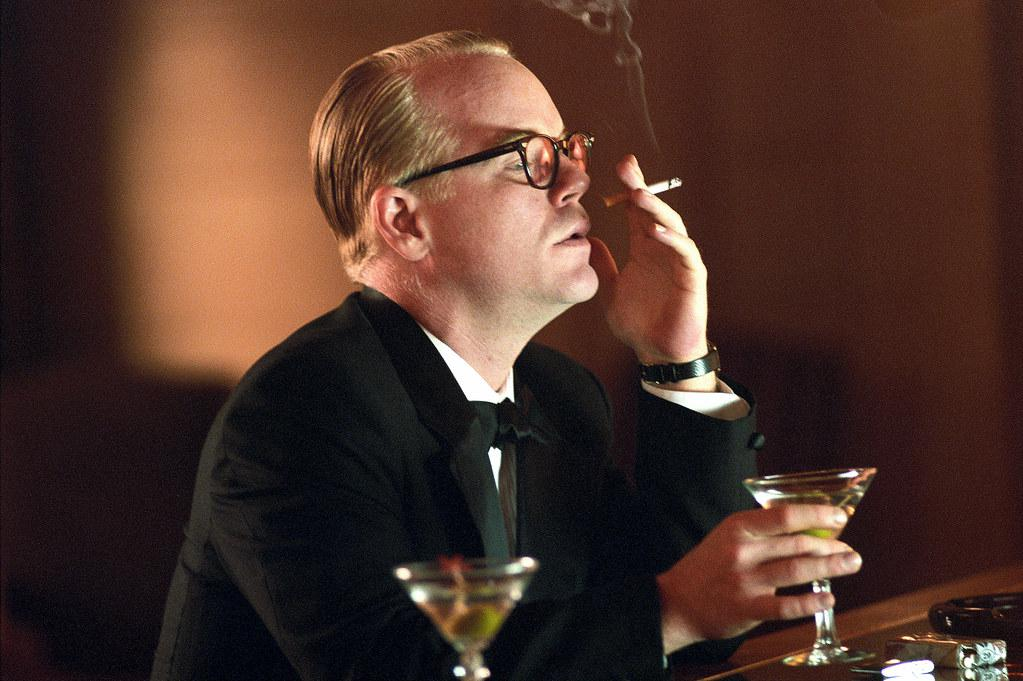

In [7]:
comparison["Image"][93]

You can also use the image embeddings to find similar images to a given image like Google's Reverse Search. The cosine similarity is used to find the most similar images to the query. The top 3 results are shown.

In [8]:
dicaprio = data[53]

dicaprio["Image"]

v=model.encode(dicaprio["Image"])
len(v)

512

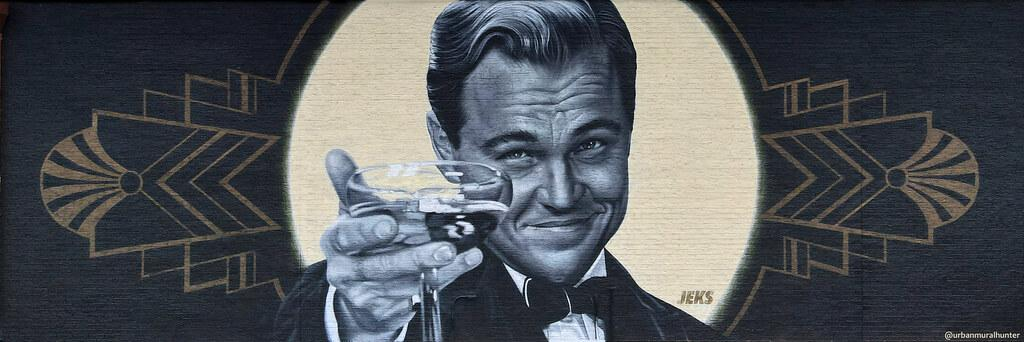

In [9]:
other_images = {"Image": [], "Similarity": []}

for img in data:
    similarity = util.cos_sim(dicaprio["Embedding"], img["Embedding"]).tolist()[0][0]
    if similarity < 0.99:
        other_images["Image"].append(img["Image"])
        other_images["Similarity"].append(similarity)

other_images = (
    pd.DataFrame(other_images).sort_values("Similarity", ascending=False).head(1)
)
other_images["Image"].iloc[0]

# More Information

Here are two videos that explain how embeddings are used in LLMs like GPT-4:

- [But what is a GPT](https://www.youtube.com/watch?v=wjZofJX0v4M)
- [Attention Blocks](https://www.youtube.com/watch?v=eMlx5fFNoYc)